# Clonning the Datasets

In [1]:
!git clone --depth 1 https://github.com/cctech-labs/challenges

Cloning into 'challenges'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 0), reused 18 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


# **Importing the Libraries**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics  import r2_score


from sklearn.model_selection import RandomizedSearchCV
import xgboost
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



**Loading the dataset using pandas**

In [4]:
%cd /content/challenges/2020/06/hiring/resources/data_science
df=pd.read_csv('dataset.csv')
df.head(30)

/content/challenges/2020/06/hiring/resources/data_science


,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2.0,1.0,9461.469590
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,2.0,5.0,10257.271938
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1.0,5.0,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3.0,2.0,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2.0,1.0,9458.427537
5,7.688266,0.871856,824.173406,462.940826,0.768816,6.705479,9118.359368,3.0,2.0,7441.792936
6,5.252539,0.897271,526.574095,250.151408,0.770116,56.625500,9360.889134,2.0,3.0,8806.508114
7,2.282011,0.838755,987.022428,311.906871,0.493161,58.570037,9340.238354,3.0,6.0,9118.925554
8,5.052074,0.505893,178.842481,381.734539,0.233114,6.549088,9488.742341,3.0,4.0,8860.349162
9,6.089318,0.814142,69.891881,393.489756,0.912482,61.485333,9940.104060,2.0,5.0,7952.540140


# **Exploring the Dataset**

*To know the mean,max,count like values of the dataset*

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,target
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,5.036548,0.504976,493.064463,297.303826,0.507925,49.781970,9507.426024,1.973333,3.436667,9118.263873
std,2.869018,0.289803,290.436017,116.899846,0.286008,28.684840,283.069448,0.788798,1.677367,852.633238
min,0.037452,0.000942,0.969406,100.651192,0.000527,0.185411,9000.096807,1.000000,1.000000,6298.862662
25%,2.518373,0.248575,247.145068,195.239150,0.284926,25.777689,9267.721916,1.000000,2.000000,8627.098283
50%,4.944200,0.524393,497.186526,301.949065,0.501211,49.517510,9500.814515,2.000000,3.000000,9208.588416
75%,7.631981,0.753136,736.572313,399.999965,0.750584,74.538269,9751.394987,3.000000,5.000000,9713.801784
max,9.997094,0.998795,999.208515,499.174221,0.999742,99.926403,9999.499080,3.000000,6.000000,11175.834533


In [8]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
target    0
dtype: int64

*There is no null values in series*

**Correlation Analysis**


*It shows the correlation of one variable to all other variables*


1.   Greater the correlation,more it will related to other variable.
2.   We can discard the feature having more correlation.
3.   variable with it obviously have 1 correlation.




In [9]:
pd.options.display.float_format='{:,.3f}'.format
df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000,-0.028,0.002,0.019,0.030,-0.030,0.030,-0.001,-0.047,0.038
1,-0.028,1.000,0.022,0.005,-0.004,0.065,0.032,-0.026,0.013,0.111
2,0.002,0.022,1.000,-0.035,0.041,-0.033,-0.014,0.005,0.038,0.319
3,0.019,0.005,-0.035,1.000,0.010,-0.031,0.030,0.003,0.006,-0.007
4,0.030,-0.004,0.041,0.010,1.000,0.021,0.081,-0.070,-0.009,-0.578
5,-0.030,0.065,-0.033,-0.031,0.021,1.000,0.031,0.069,0.066,-0.018
6,0.030,0.032,-0.014,0.030,0.081,0.031,1.000,-0.080,0.020,0.316
7,-0.001,-0.026,0.005,0.003,-0.070,0.069,-0.080,1.000,-0.006,-0.463
8,-0.047,0.013,0.038,0.006,-0.009,0.066,0.020,-0.006,1.000,0.023
target,0.038,0.111,0.319,-0.007,-0.578,-0.018,0.316,-0.463,0.023,1.000


*here we can see there is no much correlation between the variable*
{so we can't discard it}

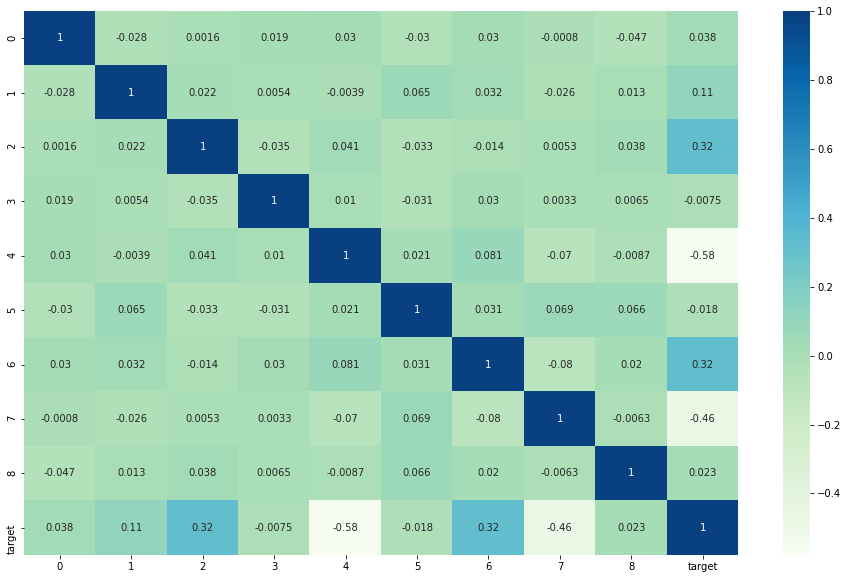

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='GnBu')
plt.show()

Assigning the Varibale to feature

In [11]:
X=df.iloc[:,:-1].values
y=df['target'].values


# Feature Scaling

*Feature Scaling is a technique to standardize the independent features present in the data in a fixed range*

It protect the feature having small range bt great impact on model from feature having big range

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)


**Splitting the data into Train and Test set**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# HyperParameter Tunning
*In machine learning, Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. ... These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem.*

In [15]:

params = {'min_child_weight':[2,4,7,15,20], 'gamma':[i/10.0 for i in range(3,8)],  'subsample':[i/10.0 for i in range(3,10)],
'colsample_bytree':[i/10.0 for i in range(3,9)],"colsample_bylevel":[i/10.0 for i in range(3,9)],  'n_estimators':[1000, 1300,1500, 2000], 
          'learning_rate':[0.01, 0.05, 0.1],'objective':['reg:linear','reg:squarederror']}
xgb = XGBRegressor(nthread=-1) 

random =RandomizedSearchCV(xgb, params)

random.fit(X_train,y_train)

[14:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=-1,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8],
                                   

*finding the best estimator*

In [16]:
random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=2, missing=None, n_estimators=1000,
             n_jobs=1, nthread=-1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

## **fiting the model**

In [18]:

model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=20, missing=None, n_estimators=1000,
             n_jobs=1, nthread=-1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=20, missing=None, n_estimators=1000,
             n_jobs=1, nthread=-1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [19]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

# Root Mean Squared Error

In [ ]:
def rmsle(y_pred,y_test) :
  error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
  Acc = 1 - error
  return Acc

In [ ]:
print(rmsle(y_pred_train, y_train),rmsle(y_pred_test, y_test))

0.9887406301043171 0.9852421621147726


# r2_score

In [ ]:
print("Train_score: %f \n Test_score: %f"%(r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)))


Train_score: 0.924873 
 Test_score: 0.876870


# Applying to Prediction Dataset
loading the prediction dataset

In [21]:
%cd '/content/challenges/2020/06/hiring/resources/data_science'
data=pd.read_csv('prediction.csv')
data.head()

/content/challenges/2020/06/hiring/resources/data_science


,0,1,2,3,4,5,6,7,8
0,8.244,0.443,814.191,437.449,0.821,66.358,"9,321.585",1.000,5.000
1,0.450,0.735,690.536,337.972,0.163,88.966,"9,653.465",2.000,3.000
2,5.806,0.413,225.544,468.295,0.255,27.854,"9,840.535",2.000,3.000
3,4.126,0.685,73.331,169.578,0.829,81.692,"9,044.806",2.000,5.000
4,8.083,0.450,526.274,308.149,0.737,30.420,"9,916.539",1.000,5.000


**Applying feature scaling**

In [22]:
sc_data=StandardScaler()
data=sc_X.fit_transform(data)

In [23]:
final=model.predict(data)

In [ ]:
target_data=pd.DataFrame({"target": final})
target_data

,target
0,"9,239.205"
1,"9,989.638"
2,"9,527.916"
3,"7,601.161"
4,"9,641.141"
...,...
95,"8,611.601"
96,"8,274.449"
97,"9,227.591"
98,"9,561.056"


# *Exporting into excel sheet*

In [ ]:
target_data.to_excel('prediction_target.xlsx',index=False)
